In [270]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import scipy.constants as cte
import sympy as sym

In [271]:
def Search4Max(df,vecref):
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] == np.max(vecref):
            maxin = i
            break
    return maxin

def lenght_between(diffpix,diff,diff_pix_recorded):
    return (diff/(diffpix))*diff_pix_recorded

def Find_Maxima(data,initial):
    maxima = np.array([])
    
    for i in range(1,len(data)-1):
        izq = data[i] - data[i-1]
        der = data[i+1] - data[i] 
        print(i,izq,der,"\n")
        if izq > 0 and der < 0:

            maxima = np.append(maxima,[initial + i,data[i]])
    return maxima

def E(n):
    E_0 = 13.6/n**2
    return E_0
            
    
    

In [272]:
path = "C:/Users/juank/Escritorio/Universidad/202320/Lab Moderna/Modern_Phy_Lab/Espectros Hidrógeno y Deuterio/data/"
path_img = "C:/Users/juank/Escritorio/Universidad/202320/Lab Moderna/Modern_Phy_Lab/Espectros Hidrógeno y Deuterio/images/"

Hydrogen = pd.read_csv(path + "h.csv" )
Deuteron = pd.read_csv(path + "d.csv")
Neon = pd.read_csv(path + "ne.csv")

axis = Hydrogen["Distance_(pixels)"].to_numpy()

Hy = Hydrogen["Gray_Value"].to_numpy()

Dy = Deuteron["Gray_Value"].to_numpy()

Ney = Neon["Gray_Value"].to_numpy()


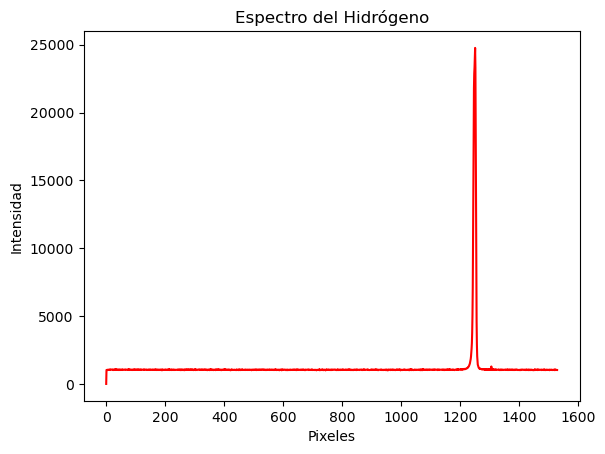

In [273]:
plt.plot(axis,Hy,"red")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro del Hidrógeno")
plt.savefig(path_img+"hydrogen_spectra.pdf")

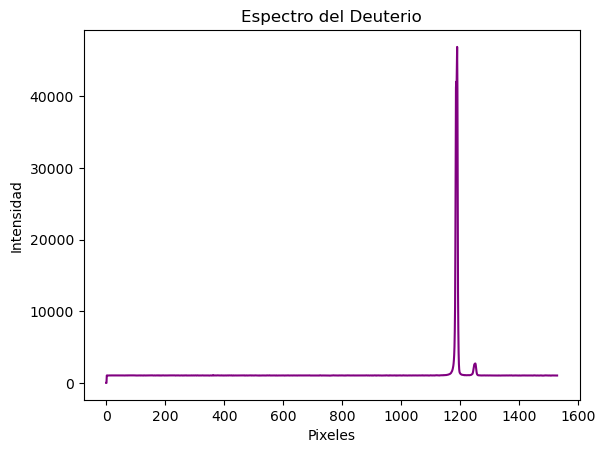

In [274]:
plt.plot(axis,Dy,"purple")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro del Deuterio")
plt.savefig(path_img+"deuteron_spectra.pdf")

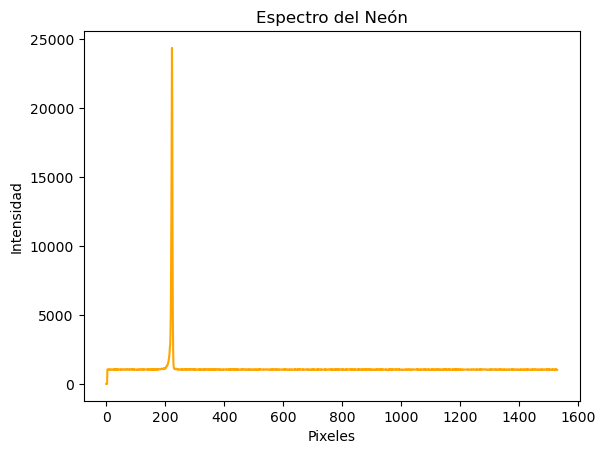

In [275]:
plt.plot(axis,Ney,"orange")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro del Neón")
plt.savefig(path_img+"neon_spectra.pdf")

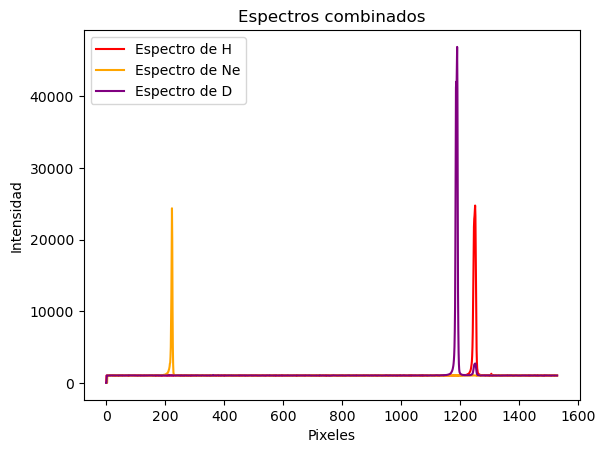

In [276]:
plt.plot(axis,Hy,label="Espectro de H",color="red")
plt.plot(axis,Ney,label="Espectro de Ne",color="orange")
plt.plot(axis,Dy,label="Espectro de D",color="purple")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros combinados")
plt.legend()
plt.savefig(path_img+"mixed_spectra.pdf")

In [277]:
maxH = Search4Max(Hydrogen,Hy)
maxNe = Search4Max(Neon,Ney)
maxD = Search4Max(Deuteron,Dy)
diffpixDH = abs(maxH-maxD)
diffpixNeD = abs(maxD - maxNe)
diffpixNeH = abs(maxH - maxNe)
print(diffpixDH)
maxH,maxNe,maxD

61


(1251, 223, 1190)

In [278]:
Neline =  653.288e-9
Halpha =  656.285e-9
Dalpha = 656.291e-9
diffDH = abs(Dalpha - Halpha)
diffNeD = abs(Neline - Dalpha)
diffNeH = abs(Neline - Halpha)


In [279]:
lenght_between(diffpixNeD,diffNeD,diffpixDH)

1.8943433298862402e-10

In [280]:
wvlenH = Neline + lenght_between(diffpixNeD,diffNeD,diffpixNeD)
wvlenH

6.56291e-07

In [281]:
wvlenD = Neline + lenght_between(diffpixNeD,diffNeD,diffpixNeH)
wvlenD

6.564804343329886e-07

In [282]:
Dalpha - lenght_between(diffpixNeD,diffNeD,diffpixNeD)

6.53288e-07

In [283]:
init = 1170
finaldh = 1275
finalh = 1210

Dreduced = Dy[init:finaldh]
Dyaxis = axis[init:finaldh]
Hreduced = Hy[init:finaldh]

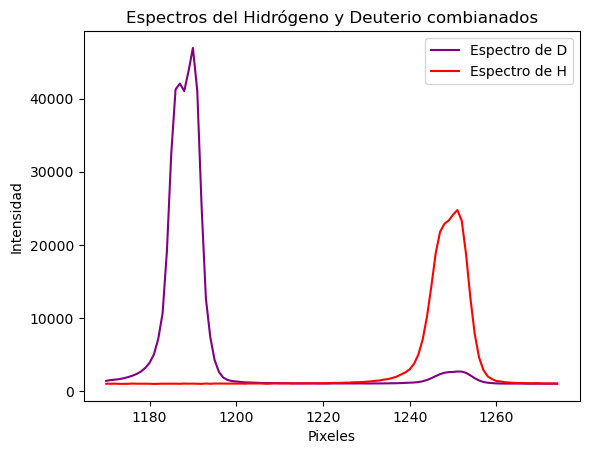

In [284]:
plt.plot(Dyaxis,Dreduced,color="purple",label="Espectro de D")
plt.plot(Dyaxis,Hreduced, "red",label="Espectro de H")
plt.legend()
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros del Hidrógeno y Deuterio combianados")
plt.savefig(path_img+"hydrogen_plus_deuteron_spectra.pdf")

20


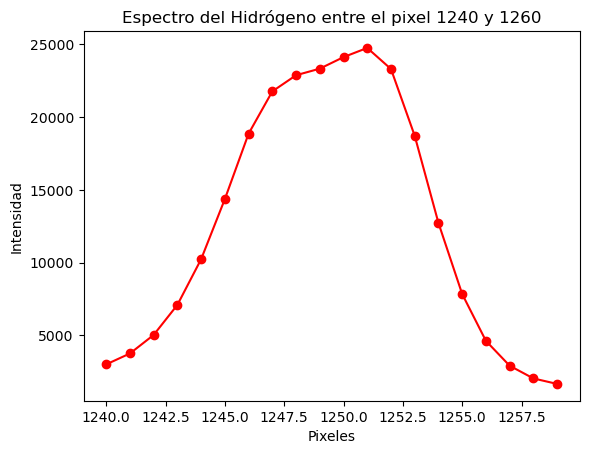

In [285]:
finalh = 1260
inith = 1240
H_alone = Hy[inith:finalh]
print(len(H_alone))

plt.scatter(axis[inith:finalh],H_alone,color="red")
plt.plot(axis[inith:finalh],H_alone,color="red")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro del Hidrógeno entre el pixel 1240 y 1260")
plt.savefig(path_img+"hydrogen_reduced_spectra.pdf")

In [286]:
max2 = Find_Maxima(H_alone,inith)
max2

1 750 1274 

2 1274 2066 

3 2066 3141 

4 3141 4132 

5 4132 4497 

6 4497 2907 

7 2907 1111 

8 1111 451 

9 451 794 

10 794 632 

11 632 -1450 

12 -1450 -4593 

13 -4593 -5988 

14 -5988 -4887 

15 -4887 -3220 

16 -3220 -1709 

17 -1709 -873 

18 -873 -378 



array([ 1251., 24764.])

In [287]:
max1 = (1248,Hy[1248])
max2 = (max2[0],max2[1])
max1,max2

((1248, 22887), (1251.0, 24764.0))

In [288]:
fine_structure = max2[0] - max1[0]

lDH = lenght_between(diffpixNeD,diffNeD,fine_structure)
lDH


9.316442605997902e-12

In [289]:
h = cte.h
k = 1/(4*cte.pi*cte.epsilon_0) 
e = cte.elementary_charge
e0 = cte.epsilon_0
me = cte.electron_mass
c = cte.c
mp = cte.proton_mass
gamma = (5/36)*k*e**2/(2*me*e0)
print(me/mp)
print((h*c*lenght/(gamma*Halpha*Dalpha))**(-1))

0.000544617021484666
-7.178321740595998e+35


In [290]:
alpha = q**2/(2*e0*(E(2)-E(3))*656.291e-9)
alpha

1.1693356795060234e-21

20


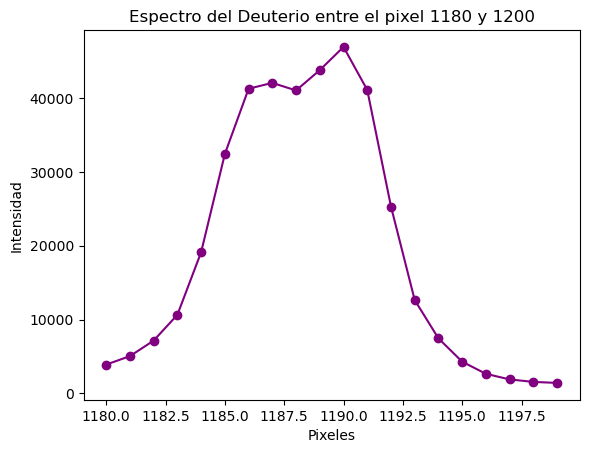

In [291]:
finald = 1200
initd = 1180
D_alone = Dy[initd:finald]
print(len(D_alone))

plt.scatter(axis[initd:finald],D_alone,color="purple")
plt.plot(axis[initd:finald],D_alone,color="purple")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectro del Deuterio entre el pixel 1180 y 1200")
plt.savefig(path_img+"deuterium_reduced_spectra.pdf")

In [292]:
Find_Maxima(D_alone,initd)

1 1143.0 2104.5 

2 2104.5 3492.75 

3 3492.75 8476.75 

4 8476.75 13298.0 

5 13298.0 8834.5 

6 8834.5 794.75 

7 794.75 -1029.25 

8 -1029.25 2756.75 

9 2756.75 3139.25 

10 3139.25 -5827.0 

11 -5827.0 -15782.25 

12 -15782.25 -12667.25 

13 -12667.25 -5187.5 

14 -5187.5 -3154.0 

15 -3154.0 -1644.5 

16 -1644.5 -757.75 

17 -757.75 -337.25 

18 -337.25 -137.5 



array([ 1187.  , 42042.  ,  1190.  , 46908.75])

In [293]:
deltalambdaDH = 2*abs(wvlenD - wvlenH)/wvlenD 

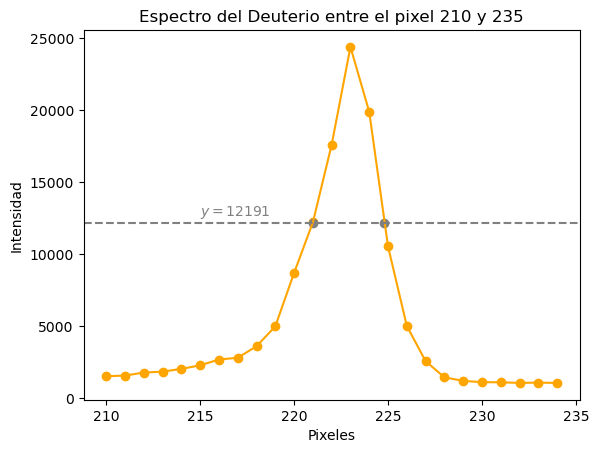

In [294]:
Ne_alone = Ney[210:235]
plt.scatter(axis[210:235],Ne_alone, color="orange")
plt.plot(axis[210:235],Ne_alone, color="orange")
plt.axhline(y = max(Ne_alone)/2,linestyle="--",color="grey")
plt.text(215,12700,r"$y = 12191$",color="grey")
plt.title("Espectro del Deuterio entre el pixel 210 y 235")
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.scatter([221,224.8],[12191,12191],color="grey")
plt.savefig(path_img + "neon_reduced_spectra.pdf")


In [295]:
Neline/lenght_between(diffpixNeD,diffNeD,3)

70122.04417804441

In [296]:
lenght_between(diffpixNeD,diffNeD,1) -0.0031054808686659674e-9

0.0

In [320]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 

    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    return mean(*measures),sigma(*measures)

In [321]:
vars = "lambda"
var = sym.symbols(vars)
var = np.array([var])

un_deltalambda = 0.003e-9
deltalambdaDH = wvlenD - wvlenH

sig = np.array([un_deltalambda])
mea = np.array([deltalambdaDH])
exp = 2*var[0]/wvlenD

GetPropagation(exp,var,sig,mea)

(0.000577121032345908, 9.13964786489981e-06)

In [322]:
me/mp

0.000544617021484666

In [323]:
2*deltalambdaDH/wvlenD

0.0005771210323459073

In [324]:
9.13964786489981e-06 - 0.00913964786489981e-03

0.0

In [329]:
vars = "lambda"
var = sym.symbols(vars)
var = np.array([var])

un_deltalambda = 0.003e-9
deltalambdaNe = lenght_between(diffpixNeD,diffNeD,3)

sig = np.array([un_deltalambda])
mea = np.array([deltalambdaNe])
exp = Neline/var[0]

GetPropagation(exp,var,sig,mea)

(70122.04417804441, 22580.09214790847)